In [1]:
import numpy as np
import pandas as pd

In [2]:
test_df=pd.read_csv(r"C:\Users\palva\Downloads\test.csv")
train_df=pd.read_csv(r"C:\Users\palva\Downloads\train.csv")
train_df

,id,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,0,133.171875,59.716081,0.043133,-0.703383,54.917224,70.084438,0.749798,-0.649512,0
1,1,87.093750,36.257973,0.435469,2.266057,3.417224,21.865069,7.039330,52.686251,0
2,2,112.640625,39.818393,0.379639,0.922306,2.730769,15.689690,8.193471,85.649785,0
3,3,120.679688,45.918448,-0.098490,0.011775,2.696488,20.954662,8.183874,70.332899,0
4,4,134.070312,57.720107,-0.107772,-0.573335,1.107860,11.255051,16.107748,308.753765,0
...,...,...,...,...,...,...,...,...,...,...
117559,117559,132.843750,56.748838,-0.060070,-0.554084,4.054348,27.844144,6.564423,44.442664,0
117560,117560,112.578125,52.539271,0.179580,-0.306961,1.637960,15.331913,11.384718,142.535470,0
117561,117561,119.757812,49.980013,0.064402,-0.270822,3.877926,19.788559,6.959740,56.367789,0
117562,117562,105.789062,46.986595,0.441426,0.372466,2.097826,17.170612,9.442445,99.074539,0


In [3]:
train_df=train_df.drop(['id','Mean_Integrated','SD','EK','Skewness'],axis=1)
test_df=test_df.drop(['id','Mean_Integrated','SD','EK','Skewness'],axis=1)

In [4]:
print(train_df.isnull().any())
print(train_df.isnull().sum())

Mean_DMSNR_Curve        False
SD_DMSNR_Curve          False
EK_DMSNR_Curve          False
Skewness_DMSNR_Curve    False
Class                   False
dtype: bool
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117564 entries, 0 to 117563
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Mean_DMSNR_Curve      117564 non-null  float64
 1   SD_DMSNR_Curve        117564 non-null  float64
 2   EK_DMSNR_Curve        117564 non-null  float64
 3   Skewness_DMSNR_Curve  117564 non-null  float64
 4   Class                 117564 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 4.5 MB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78377 entries, 0 to 78376
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_DMSNR_Curve      78377 non-null  float64
 1   SD_DMSNR_Curve        78377 non-null  float64
 2   EK_DMSNR_Curve        78377 non-null  float64
 3   Skewness_DMSNR_Curve  78377 non-null  float64
dtypes: float64(4)
memory usage: 2.4 MB


<AxesSubplot:ylabel='Count'>

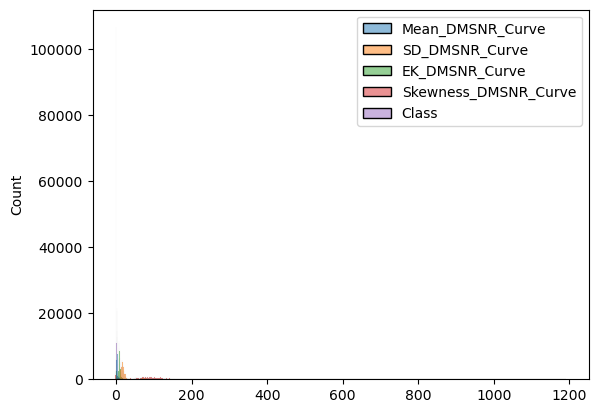

In [7]:
import seaborn as sns
sns.histplot(train_df)

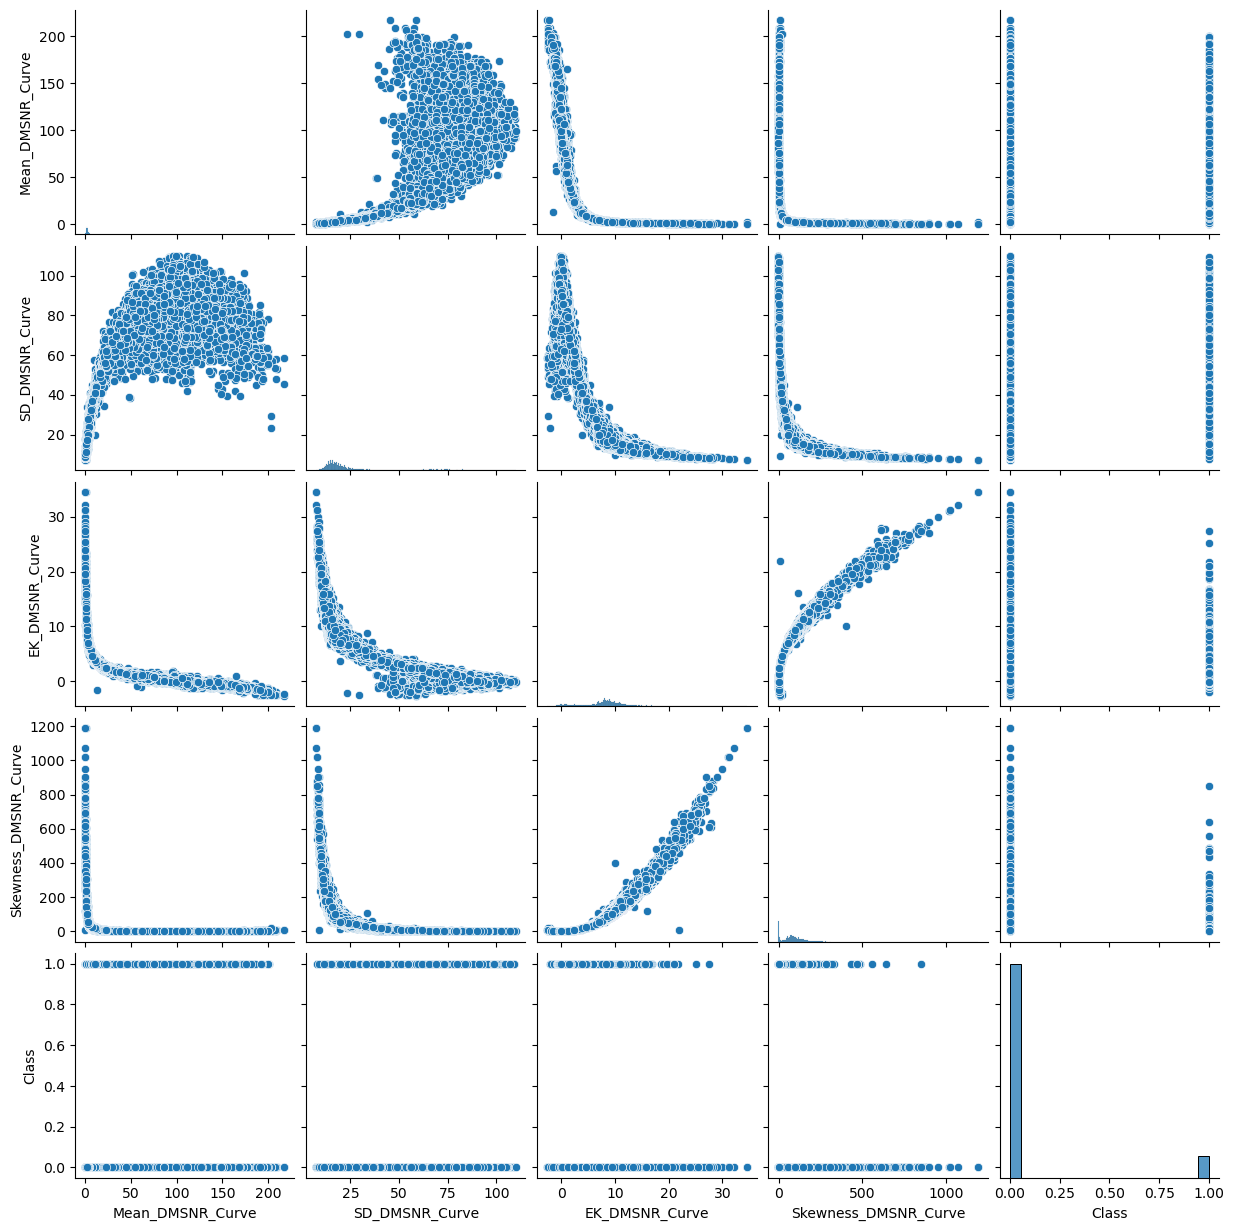

In [8]:
sns.pairplot(train_df)

In [9]:
x_train=train_df.drop('Class',axis=1)
print(x_train.shape)

(117564, 4)


In [10]:
x_train.describe()

,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
count,117564.000000,117564.000000,117564.000000,117564.000000
mean,11.962921,26.190678,8.037488,93.881076
std,26.719946,20.041937,3.840980,79.962110
min,0.213211,7.370432,-2.597872,-1.976976
25%,2.090301,14.955405,6.742911,49.409136
50%,2.808528,18.164924,8.442883,83.421375
75%,4.122910,24.732218,10.003237,122.093290
max,217.371238,109.890785,34.539844,1191.000837


In [11]:
y_train=train_df.Class
print(y_train.shape)
y_train

(117564,)


0         0
1         0
2         0
3         0
4         0
         ..
117559    0
117560    0
117561    0
117562    0
117563    0
Name: Class, Length: 117564, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,callbacks

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train,shuffle=True, test_size=0.3)

In [14]:
x_train

,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
50148,16.413043,44.495052,3.089334,8.957945
33893,3.251672,17.737955,7.908210,77.629735
86052,1.566890,12.087302,11.946287,192.914563
27327,3.817726,19.575343,6.909453,55.876639
55440,163.576923,71.810519,-0.907343,-0.826738
...,...,...,...,...
2272,2.143813,18.735560,9.638640,99.840196
38107,2.729097,17.470837,9.274792,99.309793
38559,2.094482,14.861803,10.028550,122.608034
91020,67.674749,74.200727,1.098218,0.360161


In [15]:
from keras.models import Sequential
from keras.layers import Dense
model1 = Sequential()
model1.add(Dense(100, activation='relu'))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model1.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

loss, accuracy = model1.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/50
2572/2572 [==============================] - 6s 2ms/step - loss: 0.1588 - accuracy: 0.9199 - val_loss: 0.1522 - val_accuracy: 0.9301
Epoch 2/50
2572/2572 [==============================] - 5s 2ms/step - loss: 0.1262 - accuracy: 0.9491 - val_loss: 0.1377 - val_accuracy: 0.9477
Epoch 3/50
2572/2572 [==============================] - 5s 2ms/step - loss: 0.1130 - accuracy: 0.9572 - val_loss: 0.1008 - val_accuracy: 0.9635
Epoch 4/50
2572/2572 [==============================] - 5s 2ms/step - loss: 0.1087 - accuracy: 0.9599 - val_loss: 0.1062 - val_accuracy: 0.9639
Epoch 5/50
2572/2572 [==============================] - 5s 2ms/step - loss: 0.1076 - accuracy: 0.9606 - val_loss: 0.1001 - val_accuracy: 0.9636
Epoch 6/50
2572/2572 [==============================] - 5s 2ms/step - loss: 0.1059 - accuracy: 0.9614 - val_loss: 0.1014 - val_accuracy: 0.9630
Epoch 7/50
2572/2572 [==============================] - 5s 2ms/step - loss: 0.1038 - accuracy: 0.9621 - val_loss: 0.0967 - val_accuracy:

In [16]:
modelpre= model1.predict(test_df)

2450/2450 [==============================] - 3s 1ms/step


In [17]:
model1.save('PulsarClassification.h5')

C:\Users\palva\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
test_df

,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve
0,2.337793,14.868335,9.591760,117.988781
1,1.574415,12.501437,11.694968,182.704822
2,3.576923,21.243336,7.252386,59.021499
3,6.669732,29.013153,5.097661,27.105240
4,2.218227,17.041064,9.766006,117.131775
...,...,...,...,...
78372,1.120401,13.883072,14.153556,213.485463
78373,2.342809,13.008583,9.907167,136.815454
78374,2.116221,14.639555,10.898768,147.929016
78375,1.903010,15.844982,10.723755,143.273847


In [26]:
pred = np.array([[2.33,14.86,9.59,117.98]])
pred = pred.reshape(1,4)
pred.shape

(1, 4)

In [27]:
pred = pd.DataFrame(pred)
pred

,0,1,2,3
0,2.33,14.86,9.59,117.98


In [28]:
val = model1.predict(pred)
val

1/1 [==============================] - 0s 31ms/step


array([[0.00562256]], dtype=float32)

In [29]:
if val >= 0.5 :
  print('The Star is classified as a Pulsar')
else :
  print('The Star is not classified as a Pulsar')

The Star is not classified as a Pulsar


In [32]:
pip install streamlit

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.



  Using cached streamlit-1.26.0-py2.py3-none-any.whl (8.1 MB)
  Using cached GitPython-3.1.34-py3-none-any.whl (188 kB)
  Using cached Pympler-1.0.1-py3-none-any.whl (164 kB)
  Using cached tenacity-8.2.3-py3-none-any.whl (24 kB)
  Using cached validators-0.22.0-py3-none-any.whl (26 kB)
  Using cached rich-13.5.2-py3-none-any.whl (239 kB)
  Using cached blinker-1.6.2-py3-none-any.whl (13 kB)
     ---------------------------------------- 24.4/24.4 MB 2.9 MB/s eta 0:00:00
  Using cached tzlocal-4.3.1-py3-none-any.whl (20 kB)
  Using cached pydeck-0.8.0-py2.py3-none-any.whl (4.7 MB)
  Using cached gitdb-4.0.10-py3-none-any.whl (62 kB)
  Using cached Pygments-2.16.1-py3-none-any.whl (1.2 MB)
  Using cached pytz_deprecation_shim-0.1.0.post0-py2.py3-none-any.whl (15 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached smmap-5.0.0-py3-none-any.whl (24 kB)
  Attempting uninstall: tenacity
    Found existing installation: tenacity 8.0.1
    Uninstalling tenacity-8.0.1:

In [36]:
import streamlit as st

# Define your app
def app():
    input5 = st.number_input('Mean DMSNR Curve')
    input6 = st.number_input('SD of DMNSR Curve')
    input7 = st.number_input('EK of DMSNR Curve')
    input8 = st.number_input('Skewness of DMSNR Curve')

    # Make a prediction using your model
    prediction = model1.predict([[input5, input6, input7, input8]])

    # Return the prediction as a string
    st.write('Prediction:', 'The Star is classified as a Pulsar' if prediction[0] >= 0.5 else 'The Star is not classified as a Pulsar')

# Run your app
if __name__ == '__main__':
    app()

1/1 [==============================] - 0s 47ms/step


In [37]:
! streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py
